### Importação dos dados



In [157]:
import pandas as pd
import matplotlib.pyplot as plt


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


# 1. Análise do faturamento


In [158]:
lojas = [loja, loja2, loja3, loja4]

faturamento = [loja['Preço'].sum() for loja in lojas]


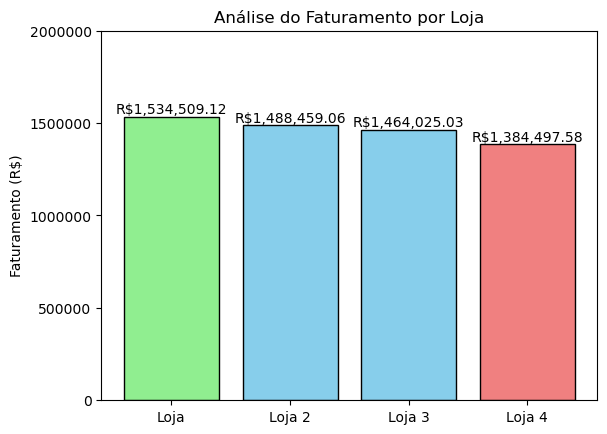

In [159]:
cores = ['lightcoral' if valor == min(faturamento) else 'lightgreen' if valor == max(faturamento) else 'skyblue' for valor in faturalmento]

lojas_grafico = ['Loja', 'Loja 2', 'Loja 3', 'Loja 4']

plt.bar(lojas_grafico, faturamento, color=cores, edgecolor='black')

plt.title('Análise do Faturamento por Loja')
plt.ylabel('Faturamento (R$)')


plt.yticks(range(0, int(max(faturamento)) + 500000, 500000))

plt.ticklabel_format(style='plain', axis='y')


for i, valor in enumerate(faturamento):
    plt.text(i, valor ,f'R${valor:,.2f}', ha='center', va='bottom', fontsize = 10)


plt.show()

# 2. Vendas por Categoria


In [160]:


categorias = ['moveis', 'eletronicos', 'brinquedos', 'eletrodomesticos', 'esporte e lazer', 'instrumentos musicais', 'livros', 'utilidades domesticas' ]

soma_por_categoria_loja = {}

def somar_categoria(loja, categoria):  
    for i in categoria:
        soma_categoria = round(loja[loja['Categoria do Produto'] == i]['Preço'].sum(),2)
        soma_por_categoria_loja[i] = soma_categoria
        
    return soma_por_categoria_loja 

def transformar_dict_lista(dicionario):
    chaves = list(dicionario.keys())
    valores = list(dicionario.values())
    return chaves, valores
    
soma_por_categoria_loja1 = somar_categoria(loja, categorias)
categoriasLoja1, valoresLoja1 = transformar_dict_lista(soma_por_categoria_loja1)


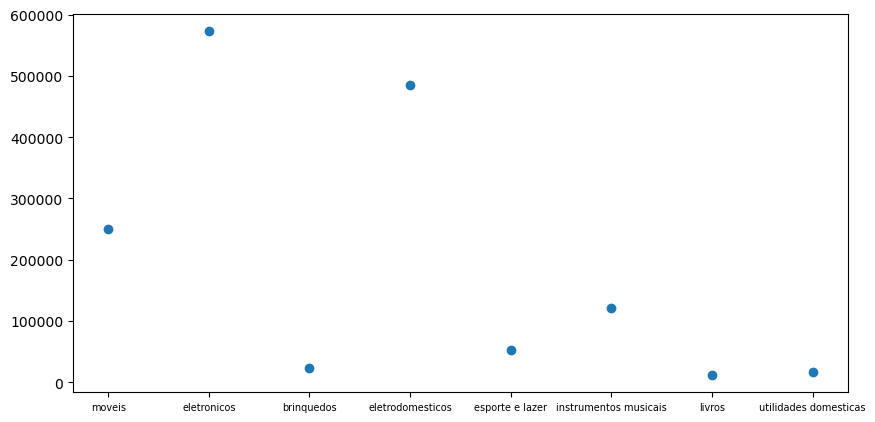

In [161]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))



plt.scatter(categoriasLoja1, valoresLoja1)
plt.xticks(rotation=0, fontsize = 7)  # Alinha os rótulos à direita
plt.subplots_adjust(bottom=0.25)
plt.show()

# 3. Média de Avaliação das Lojas

In [162]:

def media_avaliacao(loja):
    media = round(loja['Avaliação da compra'].mean(),2)
    return media

avaliacao_loja1 = media_avaliacao(loja)
avaliacao_loja2 = media_avaliacao(loja2)
avaliacao_loja3 = media_avaliacao(loja3)
avaliacao_loja4 = media_avaliacao(loja4)

avaliacoes = [avaliacao_loja1, avaliacao_loja2, avaliacao_loja3, avaliacao_loja4]




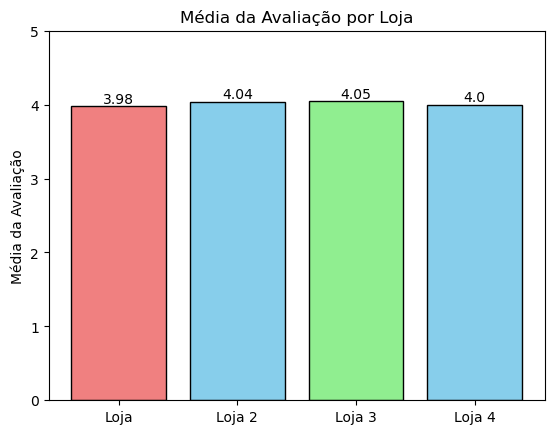

In [163]:
cores = ['lightcoral' if valor == min(avaliacoes) else 'lightgreen' if valor == max(avaliacoes) else 'skyblue' for valor in avaliacoes]

plt.bar(lojas_grafico, avaliacoes, color= cores, edgecolor = 'black')

plt.title('Média da Avaliação por Loja')
plt.ylabel('Média da Avaliação')
plt.ylim(0, 5) 

for i, valor in enumerate(avaliacoes):
    plt.text(i, valor , str(valor), ha='center', va='bottom')


plt.show()


# 4. Produtos Mais e Menos Vendidos

In [164]:
lojas = [loja, loja2, loja3, loja4]

def mais_menos_vendido(loja):
    
    produto_mais_vendido = loja.loc[loja['Preço'].idxmax(), 'Produto']
    preco_mais_vendido = loja.loc[loja['Preço'].idxmax(), 'Preço']

    produto_menos_vendido = loja.loc[loja['Preço'].idxmin(), 'Produto']
    preco_menos_vendido = loja.loc[loja['Preço'].idxmin(), 'Preço']
    
    return (produto_mais_vendido, preco_mais_vendido), (produto_menos_vendido, preco_menos_vendido)



mais_vendidos = [mais_menos_vendido(i)[0][0] for i in lojas]
preco_mais_vendidos = [mais_menos_vendido(i)[0][1] for i in lojas]
menos_vendidos = [mais_menos_vendido(i)[1][0] for i in lojas]
preco_menos_vendidos = [mais_menos_vendido(i)[1][1] for i in lojas]

# 5. Frete Médio por Loja


In [165]:
def frete_loja(loja):
    frete = round((loja['Frete'].mean()),2)
    return frete

fretes = [frete_loja(i) for i in lojas]



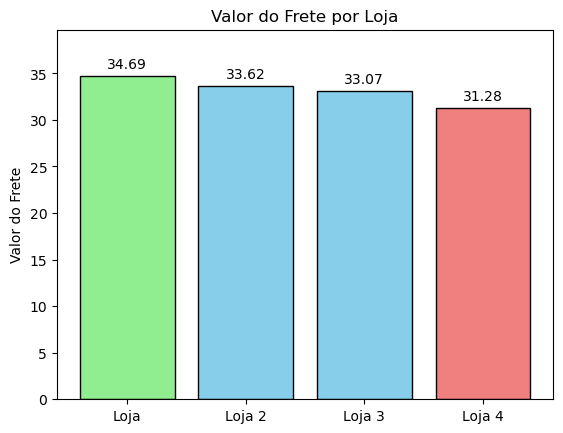

In [ ]:
import matplotlib.pyplot as plt



cores = ['lightcoral' if valor == min(fretes) else 'lightgreen' if valor == max(fretes) else 'skyblue' for valor in fretes]


plt.bar(lojas_grafico, fretes, color=cores, edgecolor='black')


plt.title('Valor do Frete por Loja')
plt.ylabel('Valor do Frete') 
plt.ylim(0, max(fretes) + 5) 


for i, valor in enumerate(fretes):
    plt.text(i, valor + 0.5, str(valor), ha='center', va='bottom')  
    
plt.show()

